**Data Mining dataPelanggan : Ujian Tengah Semester**

Langkah 1 : Upload And Load Data

In [10]:
import pandas as pd
df = pd.read_csv('data_pelanggan.csv')
df.head()

,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal


Langkah 2 : Exporasi Data

In [3]:
df.info()
print("\nMissing Values: \n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               100 non-null    int64 
 1   pendapatan         100 non-null    int64 
 2   pembelian_tahunan  100 non-null    int64 
 3   loyalitas          100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB

Missing Values: 
 umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


Index(['umur', 'pendapatan', 'pembelian_tahunan', 'loyalitas'], dtype='object')

Langkah 3 : Visualisasi

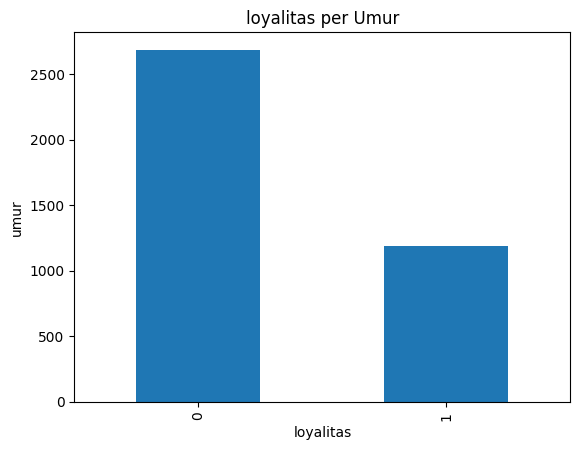

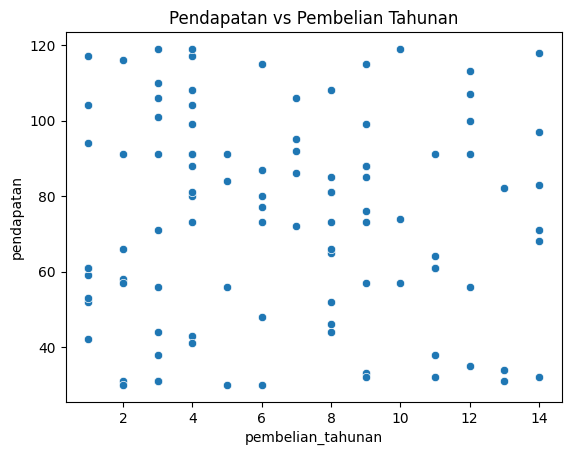

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('loyalitas')['umur'].sum().plot(kind='bar', title='loyalitas per Umur')
plt.ylabel('umur')
plt.show()

sns.scatterplot(data = df, x = 'pembelian_tahunan', y = 'pendapatan')
plt.title('Pendapatan vs Pembelian Tahunan')
plt.show()

Langkah 4 : Klasifikasi 

Menggunakan metode Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['Label'] = df['pendapatan'].apply(lambda x: 1 if x > 0 else 0)
features = df[['umur', 'pembelian_tahunan', 'loyalitas']].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
 [[30]]


c:\Users\Rasyiq Surya R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Menggunakan metode KNN (k nearst neighbors)

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

df['Label'] = df['pendapatan'].apply(lambda x: 1 if x > 0 else 0)
features = df[['umur', 'pembelian_tahunan', 'loyalitas']].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
 [[30]]


c:\Users\Rasyiq Surya R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Menggunakan metode Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

df['Label'] = df['pendapatan'].apply(lambda x: 1 if x > 0 else 0)
features = df[['umur', 'pembelian_tahunan', 'loyalitas']].fillna(0)
label = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
 [[30]]


c:\Users\Rasyiq Surya R\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


----------------------

hasil dari klasifikasi menggunakan 3 metode :

- Decision Tree : 1.00 : 100%

- KNN           : 1.00: 100%

- Random Forest : 1.00 : 100%

------------------

**Kesimpulan**

Hasil klasifikasi yang menunjukkan akurasi 100% pada ketiga algoritma—Random Forest, K-Nearest Neighbors (KNN), dan Decision Tree—menunjukkan bahwa seluruh data berhasil diklasifikasikan dengan benar oleh model. Hal ini dapat mengindikasikan bahwa data yang digunakan memiliki pola yang sangat jelas dan fitur-fitur yang sangat relevan sehingga mudah dipelajari oleh model. Namun, akurasi sempurna seperti ini juga perlu diwaspadai, terutama jika dicapai hanya pada data latih (training data), karena bisa jadi model mengalami overfitting, yaitu terlalu menyesuaikan diri dengan data latih dan kurang mampu menangani data baru. Sebaliknya, jika akurasi 100% ini juga dicapai pada data uji (testing data), maka dapat disimpulkan bahwa model memiliki performa yang sangat baik dan mampu melakukan generalisasi terhadap data yang belum pernah dilihat sebelumnya. Oleh karena itu, penting untuk memastikan bahwa evaluasi dilakukan secara menyeluruh, misalnya dengan menggunakan validasi silang (cross-validation), untuk memastikan keandalan hasil klasifikasi tersebut.
